In [1]:
import numpy as np
import numba
import healpy as hp
import colorcet
from astropy.coordinates import cartesian_to_spherical
from src.Calculators.casters import THE_TRIPLE_CASTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
m = 6
fix = 881
G = 6.6743e-11 # SI
NSIDE = 4
Msol = 1.98847e30 # kg
Rsol = 6.957e8 # m
t = np.sqrt(Rsol**3 / (Msol*G )) # Follows from G = 1
c = 3e8 * t/Rsol # simulator units. Need these for the PW potential
c_cgs = 3e10 # [cm/s]
Msol_to_g = 1.989e33 # [g]
Rsol_to_cm = 6.957e10 # [cm]
den_converter = Msol_to_g / Rsol_to_cm**3

fix = str(fix)
Mbh = 10**m 
Rt =  Mbh**(1/3) # Msol = 1, Rsol = 1

In [21]:
thetas = np.zeros(192)
phis = np.zeros(192)
observers = []
for i in range(0,192):
    thetas[i], phis[i] = hp.pix2ang(NSIDE, i)
    thetas[i] -= np.pi/2
    phis[i] -= np.pi

In [67]:
phi_grid, theta_grid = np.meshgrid(phis,thetas)
radius = 3 * phi_grid/phi_grid
print(radius)

[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]]


/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_25537/2544755988.py:2: RuntimeWarning: invalid value encountered in divide
  radius = 3 * phi_grid/phi_grid


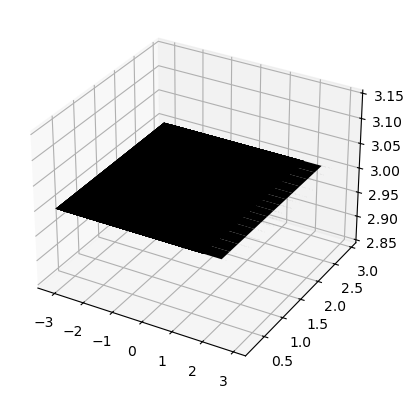

In [68]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(phi_grid, theta_grid, radius, cmap ='cet_fire')
plt.show()

In [3]:
# Import
X = np.load( str(m) + '/'  + fix + '/CMx_' + fix + '.npy')
Y = np.load( str(m) + '/'  + fix + '/CMy_' + fix + '.npy')
Z = np.load( str(m) + '/'  + fix + '/CMz_' + fix + '.npy')
Mass = np.load( str(m) + '/'  + fix + '/Mass_' + fix + '.npy')
T = np.load( str(m) + '/'  + fix + '/T_' + fix + '.npy')
Den = np.load( str(m) + '/'  + fix + '/Den_' + fix + '.npy')
Rad = np.load( str(m) + '/'  +fix + '/Rad_' + fix + '.npy')

In [4]:
Den *= den_converter 
# Convert to spherical
R, THETA, PHI = cartesian_to_spherical(X,Y,Z)
R = R.value 
THETA = THETA.value #from -pi/2 to pi/2
PHI = PHI.value
PHI -= np.pi #from -pi to pi

In [5]:
print(np.max(PHI))

3.141588635023931


In [8]:
final_density = THE_TRIPLE_CASTER(radius, R, phis, PHI, thetas, THETA, Den, weights = None, avg = False)

THE CASTER IS 10 % DONE
THE CASTER IS 20 % DONE
THE CASTER IS 30 % DONE
THE CASTER IS 40 % DONE
THE CASTER IS 50 % DONE
THE CASTER IS 60 % DONE
THE CASTER IS 70 % DONE
THE CASTER IS 80 % DONE
THE CASTER IS 90 % DONE
THE CASTER IS 100 % DONE


In [22]:
thetas = thetas + np.pi/2
print(np.min(thetas))
print(np.max(thetas))
print(np.min(phis))
print(np.max(phis))

0.20448019896853498
2.9371124546212584
-3.141592653589793
2.94524311274043


In [24]:
Rchosen = Rt
#phis longitude, thetas latitude
Xcoord = Rchosen * np.sin(thetas) * np.cos(phis)
Ycoord = Rchosen * np.sin(thetas) * np.sin(phis)
Zcoord = Rchosen * np.cos(thetas)

In [33]:
print(np.shape(final_density))
idx = np.argmin(np.abs(Rt-radius))
plot_density = final_density[idx+1]
print(np.shape(plot_density))
print(plot_density)

(1000, 192, 192)
(192, 192)
[[9.49081328e-14 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.89994454e-14 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.18111342e-13 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [34]:
final_density = np.log10(final_density) # we want a log plot
final_density = np.nan_to_num(final_density, neginf=0) # fix the fuckery

/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_25537/3007931334.py:1: RuntimeWarning: divide by zero encountered in log10
  final_density = np.log10(final_density) # we want a log plot


/var/folders/s6/3n46ppqn3jx7765w8c686c740000gn/T/ipykernel_25537/2747514530.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  img = ax.pcolormesh(Xcoord, Ycoord, plot_density, cmap= 'cet_fire', vmin = 0, vmax = 6)


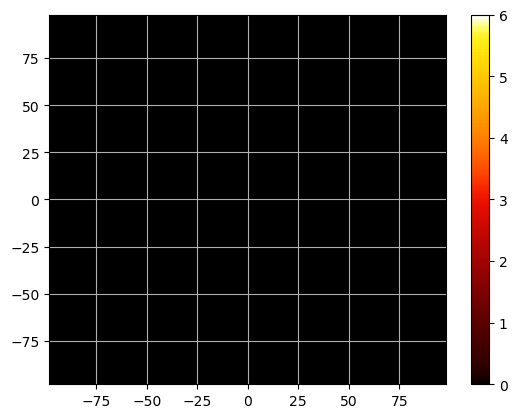

In [35]:
fig, ax = plt.subplots()
img = ax.pcolormesh(Xcoord, Ycoord, plot_density, cmap= 'cet_fire', vmin = 0, vmax = 6)
#plt.scatter(phi_peric, theta_peric, c = 'r')
fig.colorbar(img)
plt.grid(True)
plt.show()

In [10]:
# Pericenter: X = Rt, Y=0=Z
r_peric = Rt
theta_peric = np.pi/2
theta_peric -= np.pi/2
phi_peric = 0
phi_peric -= np.pi 

In [ ]:
# fig, ax = plt.subplots(1,1, subplot_kw=dict(projection="mollweide"))
# img = ax.pcolormesh(phis,thetas, plot_density, cmap= 'cet_fire', vmin = 0, vmax = 6)
# plt.scatter(phi_peric, theta_peric, c = 'r')
# fig.colorbar(img)
# plt.grid(True)
# plt.show()
